In [ ]:
''' 
As we will see from the analysis below, tumor cells for Patient 12 could not be identified.
Patient 12 is therefore excluded from further analyses.
'''

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

## Supplementary Figure _?

In [2]:
PATH_TO_CHEN_ADATA          = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data/adata_c.preprocessed.NanoMnT.h5ad'
PATH_TO_CHEN_METADATA2      = '/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.MSI.CRC.woSD.run_meta.organized.tsv'
PATH_TO_CHEN_ALLELETABLE    = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data/NanoMnT.AlleleTable.Chen_et_al.tsv.gz'

PATH_SCMSI_SCORE    = '/home/18parkky/git/CRC_MSI_intensity_analysis/scMSI-score.py'
PATH_SCMSI_FIND     = '/home/18parkky/git/CRC_MSI_intensity_analysis/scMSI-find.py'

DIR_OUT = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data'

In [3]:
adata = sc.read_h5ad(PATH_TO_CHEN_ADATA)

In [6]:
adata_P12 = adata[(adata.obs['PatientID']=='P12')].copy()
adata_P12 = adata_P12.raw.to_adata()

sc.pp.normalize_total(adata_P12)
sc.pp.log1p(adata_P12)
adata_P12.raw = adata_P12.copy()

sc.pp.highly_variable_genes(adata_P12, n_top_genes=2000, batch_key="SampleID")
adata_P12 = adata_P12[:, adata_P12.var.highly_variable]

sc.pp.scale(adata_P12, max_value=10)
sc.tl.pca(adata_P12, svd_solver="arpack")

sc.pp.neighbors(adata_P12, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_P12)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
2025-04-12 17:58:11.462851: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 17:58:11.464152: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 17:58:11.468144: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 17:58:11.479000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-12 

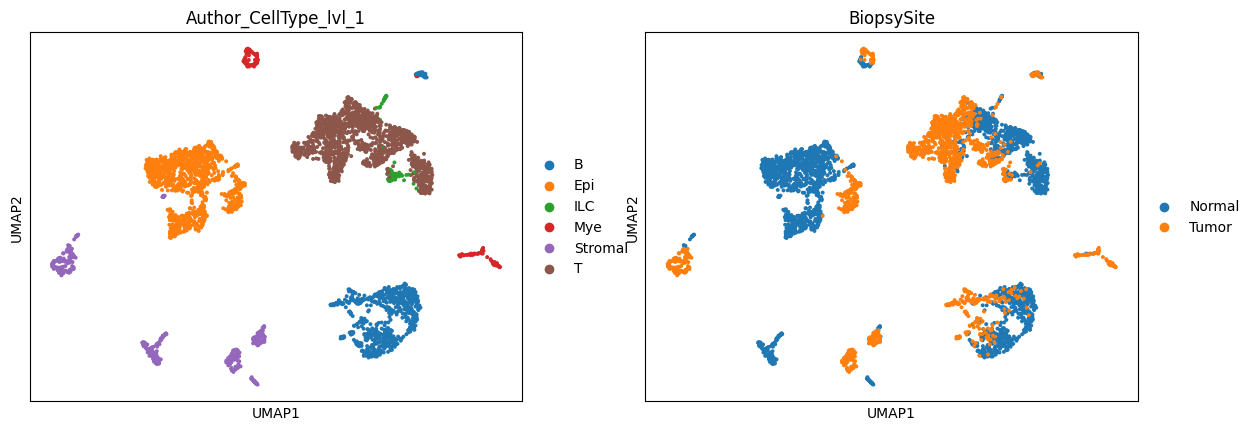

In [29]:
sc.pl.umap(adata_P12, color=['Author_CellType_lvl_1', 'BiopsySite',], ncols=2)

In [14]:
adata_P12_epi = adata_P12[(adata_P12.obs['Author_CellType_lvl_1']=='Epi')].copy()
adata_P12_epi = adata_P12_epi.raw.to_adata()

sc.pp.normalize_total(adata_P12_epi)
sc.pp.log1p(adata_P12_epi)
adata_P12_epi.raw = adata_P12_epi.copy()

sc.pp.highly_variable_genes(adata_P12_epi, n_top_genes=2000, batch_key="SampleID")
adata_P12_epi = adata_P12_epi[:, adata_P12_epi.var.highly_variable]

sc.pp.scale(adata_P12_epi, max_value=10)
sc.tl.pca(adata_P12_epi, svd_solver="arpack")

sc.pp.neighbors(adata_P12_epi, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_P12_epi)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


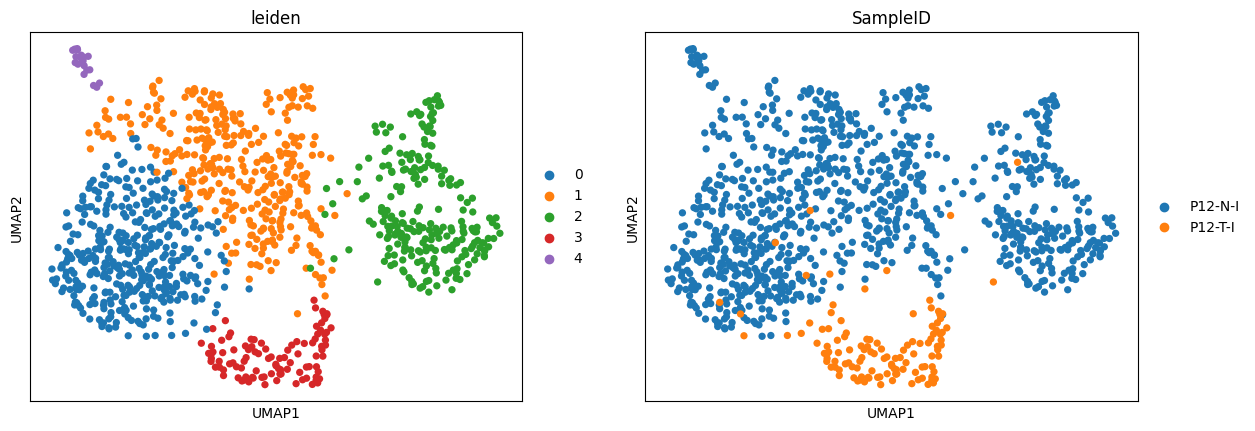

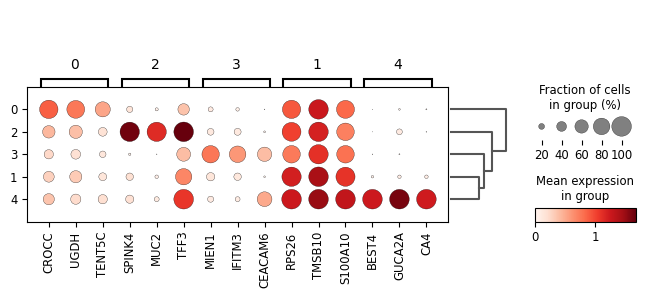

In [59]:
sc.tl.leiden(adata_P12_epi, resolution=0.2)
sc.pl.umap(adata_P12_epi, color=['leiden', 'SampleID'])

sc.tl.rank_genes_groups(adata_P12_epi, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_P12_epi, groupby='leiden', n_genes=3)

In [56]:
pd.DataFrame(adata_P12_epi.uns['rank_genes_groups']['names']).T

,0,1,2,3,4,5,6,7,8,9,...,28964,28965,28966,28967,28968,28969,28970,28971,28972,28973
0,CROCC,UGDH,TENT5C,SRSF7,ANKRD37,POLR2A,HEXIM1,NFKBIZ,MAFB,ELF3,...,TPT1,RPL30,RPS7,EEF1A1,RPS27A,RPS4X,RPS3A,RPL39,RPL10,TFF3
1,RPS26,TMSB10,S100A10,MT-ND3,RPL17,MT-CO2,RPS6,MT-CO3,RPS29,TSPAN8,...,DALRD3,ID2,UGDH,POLR2A,SQSTM1,ZFAS1,SOX4,ITGA6,NEAT1,CROCC
2,SPINK4,MUC2,TFF3,KLK1,FCGBP,WFDC2,ITLN1,SERPINA1,LRRC26,ZG16,...,S100A10,SELENBP1,CD24,SLPI,PRSS3,CYBA,MUC12,CA2,PLA2G2A,LCN2
3,MIEN1,IFITM3,CEACAM6,ERBB2,IFITM1,TIMP1,YWHAB,C4orf48,GRB7,PPP1R1B,...,AGR3,MT2A,CRIP1,PRAC1,HSPA1A,WFDC2,MT1G,AGR2,PIGR,MT1E
4,BEST4,GUCA2A,CA4,MDK,OTOP2,CA7,FABP1,MT1G,PHGR1,LYPD8,...,PRAC1,RPS5,NUPR1,FOSB,RPSA,RPS19,RPL36A,GMDS,AGR2,SPINK1


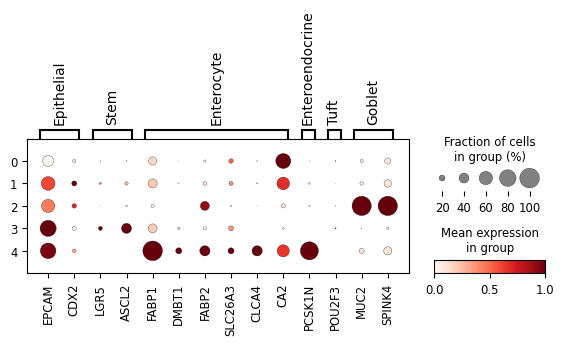

In [58]:
sc.pl.dotplot(adata_P12_epi, 
              var_names={'Epithelial' : ['EPCAM', 'CDX2'],
                         'Stem' : ['LGR5', 'ASCL2'], 
                         'Enterocyte' : ['FABP1', 'DMBT1', 'FABP2', 'SLC26A3', 'CLCA4', 'CA2'],
                         'Enteroendocrine' : ['PCSK1N',],
                         'Tuft' : ['POU2F3'],
                         'Goblet' : ['MUC2', 'SPINK4'],}, 
              standard_scale='var',
              groupby='leiden')

In [ ]:
dict_leiden_to_CellType = {
    '0' : '',
    '1' : '',
    '2' : 'Goblet',
    '3' : 'Stem',
    '4' : 'BEST4+ Enterocyte',
}